# Classification Homework Section 2: sklearn breast cancer data set

In this section you will use many of the same classifiers used in Homework Section 1, applied to a small cancer dataset packaged with sklearn.  Unlike the simulated data, this dataset is greater than 2 dimensions, which means it will not be possible to easily visualize the decision boundaries.  Nevertheless, we can apply the same techniques. 

We provide several functions for visualizing the output of your classifiers (these are the same as in Homework Section 1).  You are encouraged to look at and edit these functions to get more familiar with matplotlib, but they should work without modification.

Feel free to edit this notebook, but note that you will be using this notebook to solve your homework problems.

## Homework Instructions
For the following questions, you will train your classifiers on:

* original (raw) data
* standardized data

and observe how data data standardization affects the performance of different algorithms.

> **NOTE:** You only have *ONE* attempt at each problem.  (The first two answers are already given to you in this notebook.)  These problems are not difficult, but please pay attention to what is being asked for.  Specifically, some questions ask for *TRAINING* accuracy while others ask for *TEST* accuracy.

In [1]:
# import 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

# plot within the notebook
%matplotlib inline

# some plotting configurations
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.style.use('ggplot')
matplotlib.rcParams.update({'font.size': 16})

## Load and Inspect Data
For this set of homework problems, you will use a small cancer data set which is included with sklearn.  To load this data, use:

```python
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
```

This data set contains 569 data points with 30 features and a binary target class.  You will need to split the data into training and validation sets.  To ensure your code matches the expected homework answers, set:

```python
test_size = 0.30
random_state = 999
```

In [5]:
from sklearn.datasets import load_breast_cancer
import sklearn.model_selection as model

# load the data from sklearn.datasets
cancer = load_breast_cancer()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = model.train_test_split(cancer['data'],
                                                        cancer['target'], 
                                                        test_size = 0.30, 
                                                        random_state = 999)


In [6]:
# Store training and validation data in pandas dataframes
data_train = pd.DataFrame(np.c_[X_train, y_train],
                                columns = np.append(cancer['feature_names'], ['y']))

data_val = pd.DataFrame(np.c_[X_val, y_val],
                              columns = np.append(cancer['feature_names'], ['y']))

# look at the top 5 rows
data_train.head(5)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,...,20.29,74.35,421.1,0.1030,0.06219,0.04580,0.04044,0.2383,0.07083,1.0
1,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,0.1424,0.05883,...,25.58,96.74,694.4,0.1153,0.10080,0.05285,0.05556,0.2362,0.07113,1.0
2,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,27.78,149.60,1304.0,0.1873,0.59170,0.90340,0.19640,0.3245,0.11980,0.0
3,13.66,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,0.1848,0.06181,...,25.50,101.40,708.8,0.1147,0.31670,0.36600,0.14070,0.2744,0.08839,1.0
4,13.43,19.63,85.84,565.4,0.09048,0.06288,0.05858,0.03438,0.1598,0.05671,...,29.87,116.60,993.6,0.1401,0.15460,0.26440,0.11600,0.2884,0.07371,0.0


### Data pre-processing

Notice that the columns in `X` represent real-valued quantities and are not all on the same scale.  Some features, such as "mean smoothness" average around 0.1, while others like "mean area" average in the hundreds.

In [7]:
# look at the mean values over the columns in the training set
data_train.mean()


mean radius                 14.087786
mean texture                18.945729
mean perimeter              91.705678
mean area                  651.046482
mean smoothness              0.096132
mean compactness             0.103100
mean concavity               0.088261
mean concave points          0.048117
mean symmetry                0.180024
mean fractal dimension       0.062805
radius error                 0.404308
texture error                1.203842
perimeter error              2.865034
area error                  39.912023
smoothness error             0.006912
compactness error            0.025281
concavity error              0.032167
concave points error         0.011767
symmetry error               0.020372
fractal dimension error      0.003813
worst radius                16.166776
worst texture               25.199472
worst perimeter            106.584397
worst area                 865.315829
worst smoothness             0.131617
worst compactness            0.249927
worst concav

**Standardization** of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: **Gaussian with zero mean and unit variance.**

To standardize your data (sometimes referred to as *normalizing* or *whitening*), you can take advantage of sklearn's [Preprocessing Package](http://scikit-learn.org/stable/modules/preprocessing.html).

Below is an example of how to standardize your data based on sklearn's [RobustScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html), which normalizes the data to (approximately) zero-mean unit variance, while being more robust to outliers than the [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [8]:
from sklearn import preprocessing

# Preprocess the data to standardize using sklearn -- fit using training data only!
scaler = preprocessing.RobustScaler().fit(X_train)

# Store scaled versions of the data
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)



In [10]:
# Store training and validation data in pandas dataframes
data_train_scaled = pd.DataFrame(np.c_[X_train_scaled, y_train],
                                 columns= np.append(cancer['feature_names'], ['y']))

data_val_scaled = pd.DataFrame(np.c_[X_val_scaled, y_val],
                               columns= np.append(cancer['feature_names'], ['y']))

# look at the mean values over the columns in the scaled training set
data_train_scaled.mean()


mean radius                0.162705
mean texture               0.068907
mean perimeter             0.180144
mean area                  0.271646
mean smoothness            0.013820
mean compactness           0.186763
mean concavity             0.301924
mean concave points        0.273592
mean symmetry              0.069075
mean fractal dimension     0.168009
radius error               0.348586
texture error              0.181777
perimeter error            0.354393
area error                 0.588212
smoothness error           0.180468
compactness error          0.262235
concavity error            0.321169
concave points error       0.145484
symmetry error             0.207063
fractal dimension error    0.298527
worst radius               0.239386
worst texture             -0.000709
worst perimeter            0.225535
worst area                 0.355672
worst smoothness           0.013925
worst compactness          0.179511
worst concavity            0.161238
worst concave points       0

## Functions for training a generic sklearn classifier and plotting the results

Here we provide some functions you may find helpful for training, evaluating and visualizing your classifiers.  You are encouraged to look at these functions to understand what they're doing, but they should work without modification.

The function `train_and_plot()` takes in a sklearn classifier object, fits the model to training data, and evaluates the model on validation data.  This particular function assumes 2D data (defined by features x0_col and x1_col) and binary class labels (y = 0 or 1). 

The function `plot_data_class()` will create a 2D plot of data that has gone through a classifier.  If the original data (and therefore the classifier decision boundary) is also in 2D, it will also plot the decision boundary.

In [13]:
def plot_data_class(data, x0_col=None, x1_col=None, xx=None, yy=None, Z=None, title='Classification Results'):
    """
    Plot the classification results on data and the decision boundary 
    (Decision boundary will only be plotted if data is 2D)
    
    
    Parameters
    ----------
    data :  pandas dataframe with columns = 'x_0', 'x_1', ... 'x_n', 'y', 'y_predict'
            each row corresponds to a single data point
                column 'x_n'       : nth feature 
                column 'y'         : true data label
                column 'y_predict' : predicted data label
                
    x0_col: string corresponding to the x-axis feature
    x1_col: string corresponding to the y-axis feature
    
    xx :    nd-array containing x-axis values for contour plot, must correspond to x0_col feature in data
    yy :    nd-array containing y-axis values for contour plot, must correspond to x1_col feature in data
            xx, yy = np.meshgrid()
             
    Z :     nd-array corresponding to classifier predictions of (xx,yy)
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
    
    title :  title of the plot (optional, default: 'Classification Results')
    
    Returns
    -------
    None
    
    """
    
    # data features (exclude labels and predicted labels, if stored in the dataframe)
    features = data.columns.difference(['y','y_predict'])
    
    # If no features are specified, use the first two
    if x0_col is None: x0_col = features[0]
    if x1_col is None: x1_col = features[1]
    
    # Separate the data into correctly and incorrectly classified sets
    TP = data[(data['y']==1) & (data['y_predict']==1)]   # true positives
    FP = data[(data['y']==0) & (data['y_predict']==1)]   # false positives (type I error)
    TN = data[(data['y']==0) & (data['y_predict']==0)]   # true negatives
    FN = data[(data['y']==1) & (data['y_predict']==0)]   # false negatives (type II error)

    # Plot the contours if we're able (will pass if xx, yy, or Z are None)
    try: plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu,alpha=0.5)
    except: pass
        
    # Plot the datapoints in 2D (actual data may be in higher dimension)
    plt.scatter(TP[x0_col],TP[x1_col],marker='.',c='b',label='TP')
    plt.scatter(TN[x0_col],TN[x1_col],marker='.',c='r',label='TN')
    plt.scatter(FN[x0_col],FN[x1_col],marker='x',c='b',s=100,label='FN')
    plt.scatter(FP[x0_col],FP[x1_col],marker='x',c='r',s=100,label='FP')
    
    plt.xlabel(x0_col)
    plt.ylabel(x1_col)
    plt.legend()
    plt.title(title)
    

In [14]:
def train_and_plot(clf, data_train, data_test, plot_bool=True, x0_col=None, x1_col=None):
    
    """
    Train a classifier, evaluate, and plot
    
    Parameters
    ----------
    
    clf  :  a sklearn classifier object (e.g., sklearn.neighbors)
    
    data_train : pandas dataframe containing 2D training data
                 each row corresponds to a single data point
                        column 'y' : true label
                        
    data_test :  pandas dataframe containing 2D test data
                 each row corresponds to a single data point
                        column 'y' : true label
                        
    plot_bool :  boolean (default: True)
                 set to False to suppress plots
                 
    x0_col :     name of first feature to plot, corresponding to a column in data_train
                 if x0_col is not specified, the first column is used
                 
    x1_col :     name of second feature to plot, corresponding to a column in data_train
                 if x1_col is not specified, the second column is used
                 
                  
    Returns
    -------
    acc :   dictionary
                'acc_train' : training accuracy
                'acc_test'  : testing accuracy
    
    """
    
    
    # Define X (exclude labels and predicted labels, if stored in the dataframe)
    X_train = data_train[data_train.columns.difference(['y','y_predict'])]
    X_test = data_test[data_test.columns.difference(['y','y_predict'])]
    
    # Train (fit) the classifier to training data    
    clf = clf.fit(X_train,data_train['y'])

    # Apply the classifier to train and test data
    data_train['y_predict'] = clf.predict(X_train)
    data_test['y_predict'] = clf.predict(X_test)
    
    # Calculate train and test accuracy
    acc_train = clf.score(X_train,data_train['y'])
    acc_test = clf.score(X_test,data_test['y'])
    

    # Plot the classification
    if plot_bool:

        if x0_col is None: x0_col = X_train.columns[0]
        if x1_col is None: x1_col = X_train.columns[1]
            
            
        # If we only have 2 features, we can make a contour plot by evaluating over a grid!  Otherwise, skip.
        if X_train.shape[1] == 2:
            
            x_min = min(X_train[x0_col].min(),X_test[x0_col].min()) - 0.2
            x_max = max(X_train[x0_col].max(),X_test[x0_col].max()) + 0.2
            y_min = min(X_train[x1_col].min(),X_test[x1_col].min()) - 0.2
            y_max = max(X_train[x1_col].max(),X_test[x1_col].max()) + 0.2

            plot_step_x = (x_max-x_min)/100
            plot_step_y = (y_max-y_min)/100
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step_x),np.arange(y_min, y_max, plot_step_y))

            # Predict on grid for contour plot
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
        else:
            xx,yy,Z=None,None,None

        # Plot
        plt.figure(figsize=(20, 10))
        plt.subplot(1, 2, 1)
        plot_data_class(data_train, x0_col, x1_col, xx, yy, Z, title='Train Data, acc={:0.3f}'.format(acc_train))
        plt.subplot(1, 2, 2)
        plot_data_class(data_test, x0_col, x1_col, xx, yy, Z, title='Test Data, acc={:0.3f}'.format(acc_test))
        plt.show()

            
        
    return {'acc_train':acc_train, 'acc_test':acc_test}

### HW 2.1: Naive Bayes Training
For the Naive Bayes classifier (with no priors), what happens to the **training** accuracy when the data is normalized?

### HW 2.2: Naive Bayes Testing
For the Naive Bayes classifier (with no priors), what happens to the **test** accuracy when the data is normalized?

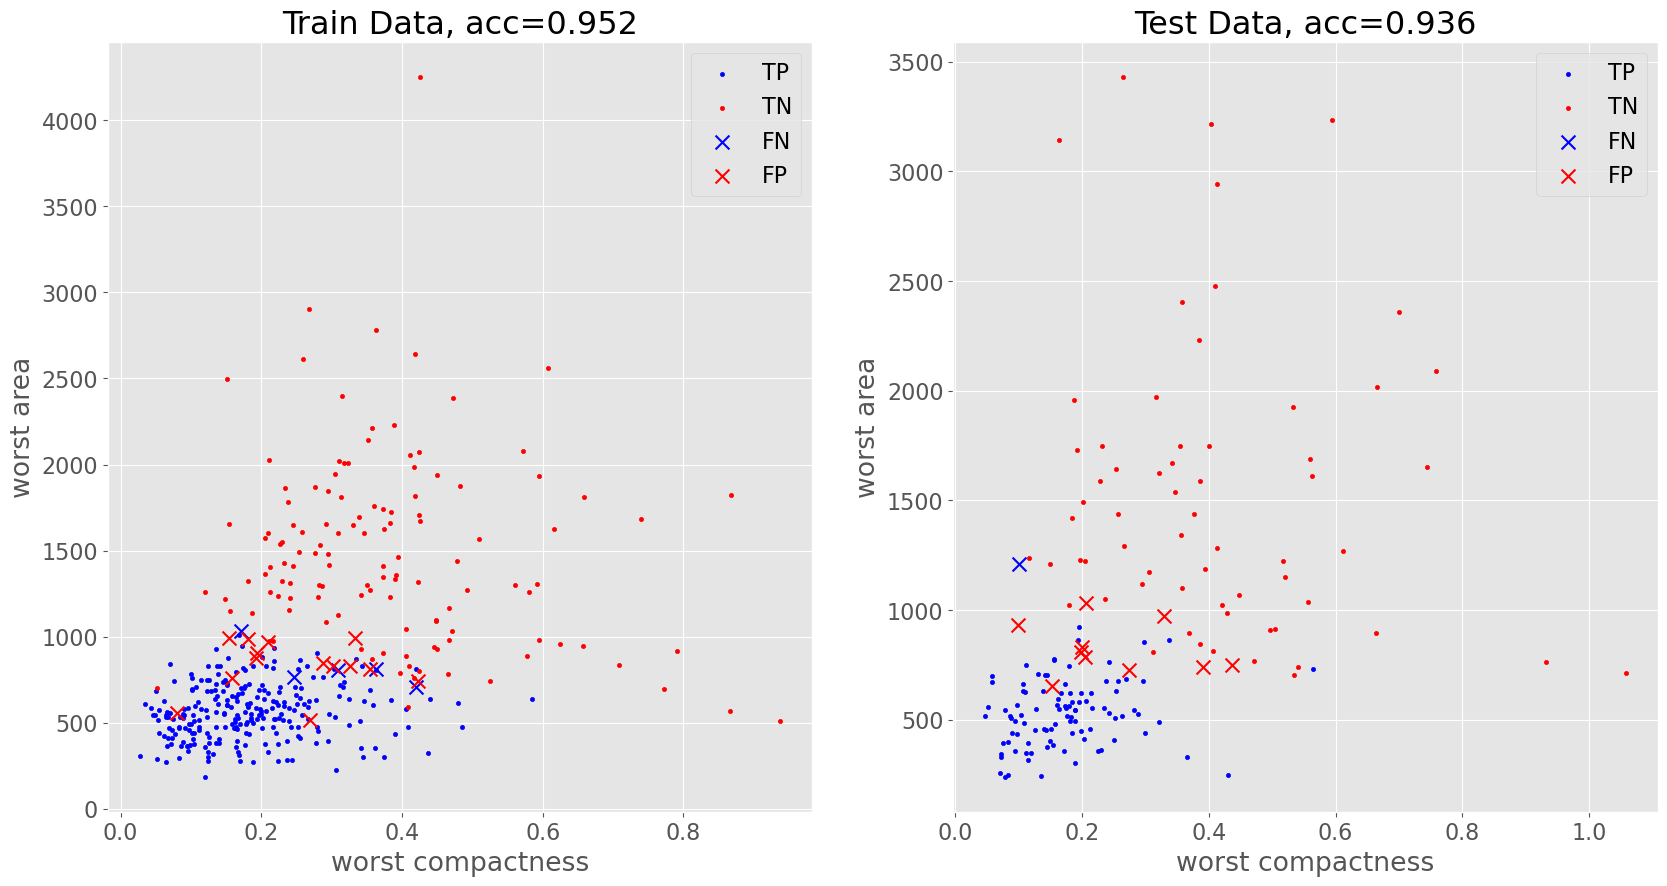

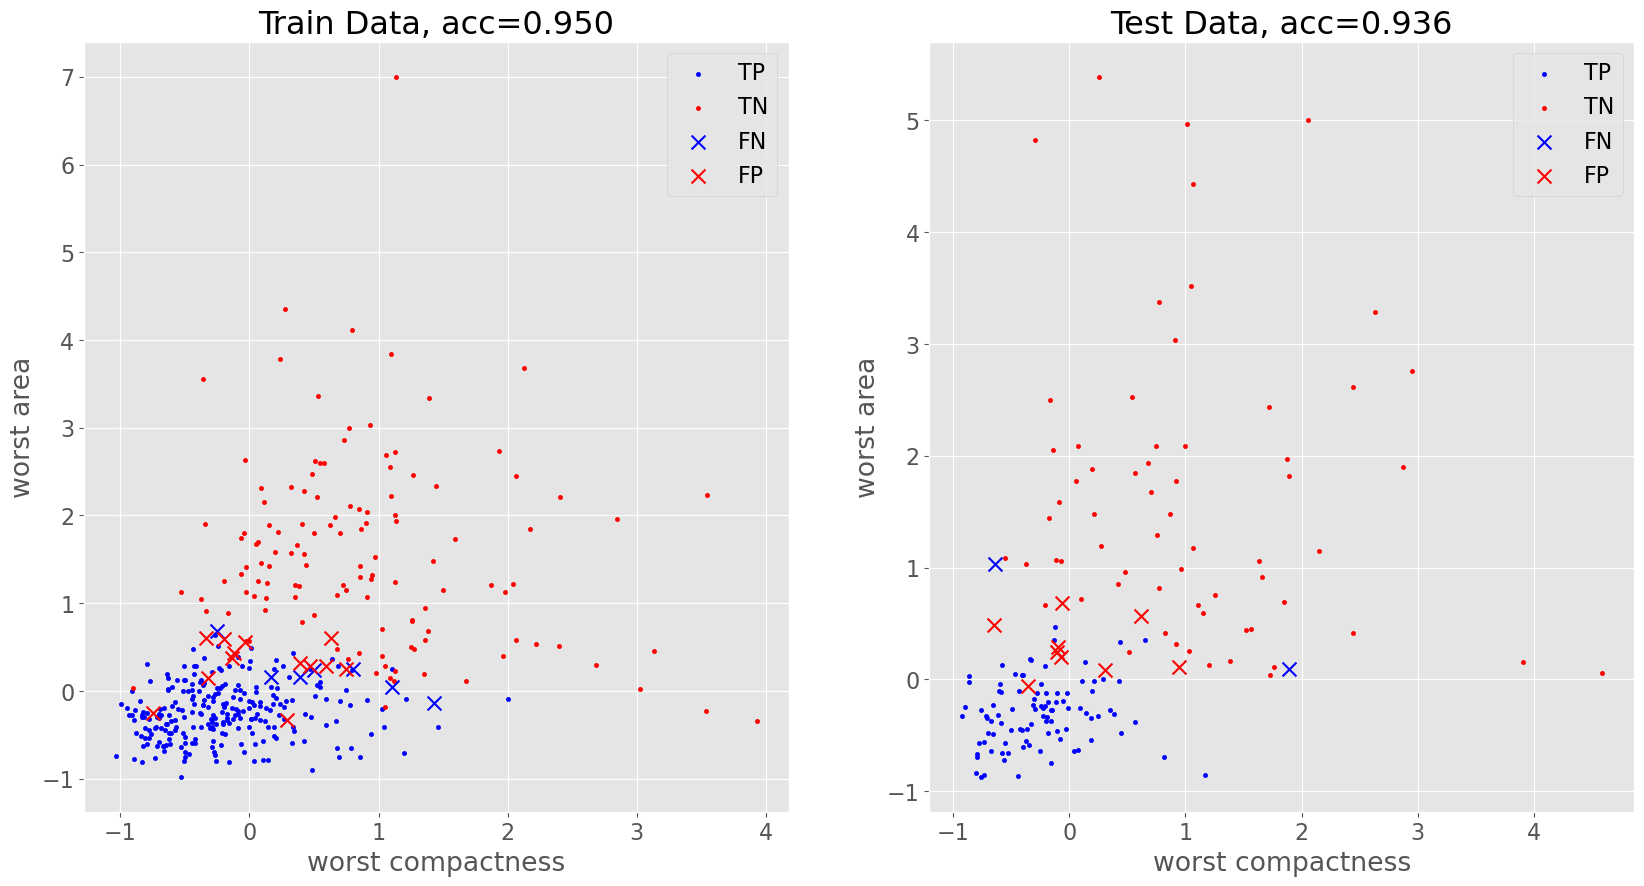


 Original (unscaled) Data:
   Training Accuracy: 0.952
   Testing Accuracy:  0.936

 Scaled (normalized) Data:
   Training Accuracy: 0.950
   Testing Accuracy:  0.936


In [24]:
from sklearn import naive_bayes
    
# Define the classifier
priors=None
test = naive_bayes.GaussianNB(priors=priors)

# Train the classifier
acc_orig = train_and_plot(test, 
                          data_train, 
                          data_val, 
                          plot_bool=True,
                          x0_col='worst compactness',
                          x1_col='worst area')

acc_norm = train_and_plot(test, 
                          data_train_scaled, 
                          data_val_scaled, 
                          plot_bool=True,
                          x0_col='worst compactness', 
                          x1_col='worst area')

# Print accuracy values
print('\n Original (unscaled) Data:')
print('   Training Accuracy: {:0.3f}'.format(acc_orig['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_orig['acc_test']))
print('\n Scaled (normalized) Data:')
print('   Training Accuracy: {:0.3f}'.format(acc_norm['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_norm['acc_test']))

### HW 2.3: Nearest Neighbor Training
For the Nearest Neighbor classifier (with `n=2`), what happens to the **training** accuracy when the data is normalized?

### HW 2.4: Nearest Neighbor Testing
For the Nearest Neighbor classifier (with `n=2`), what happens to the **test** accuracy when the data is normalized?

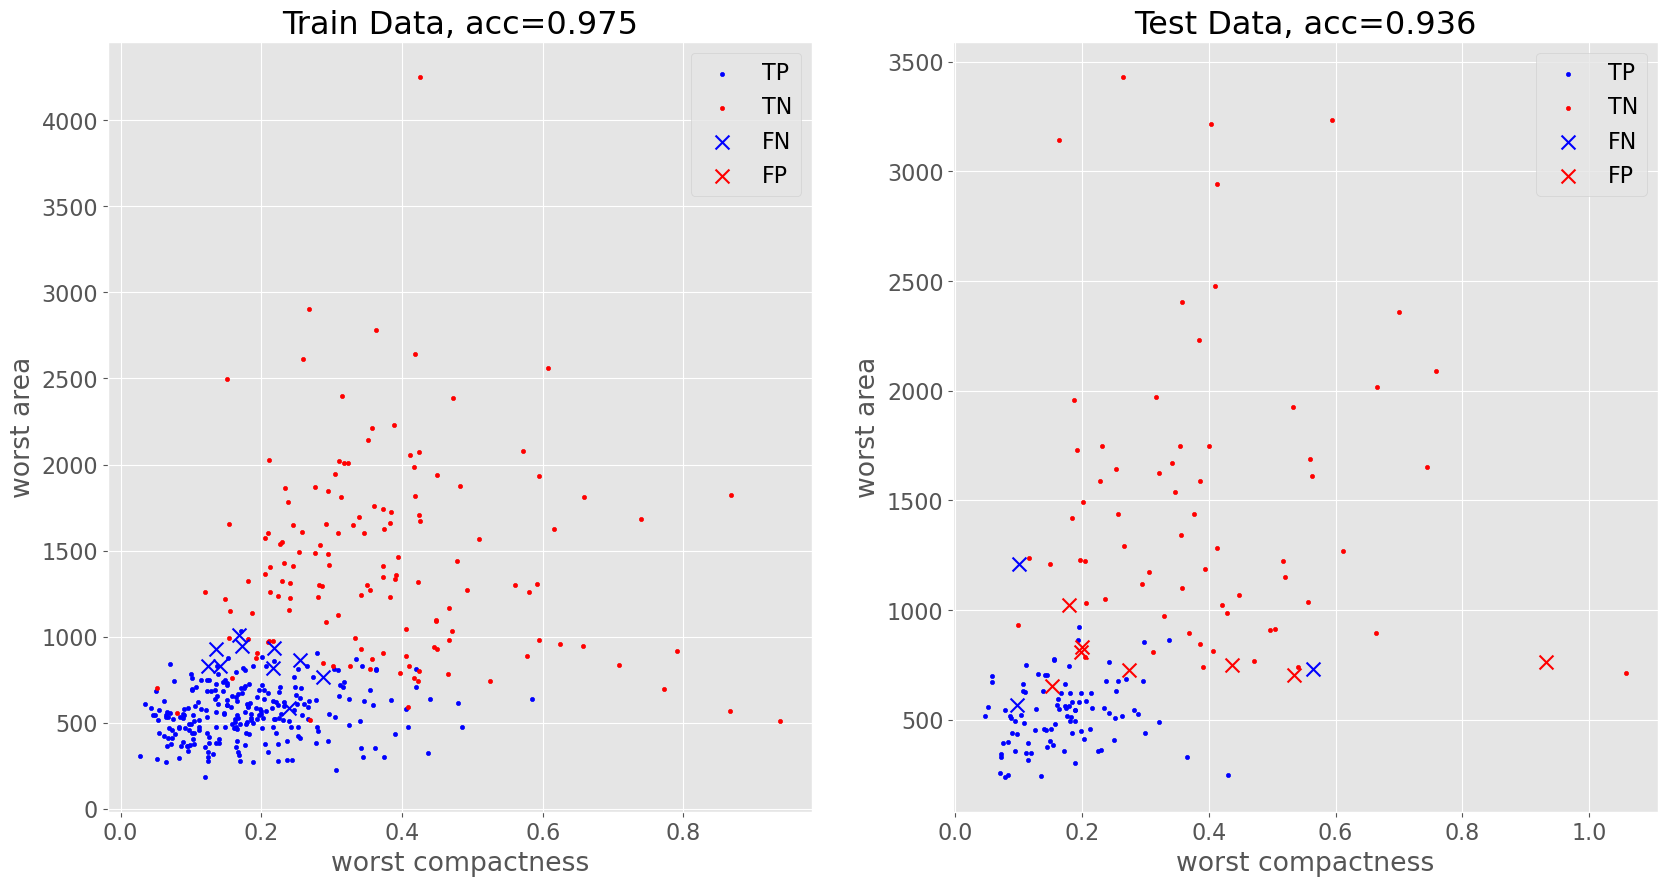

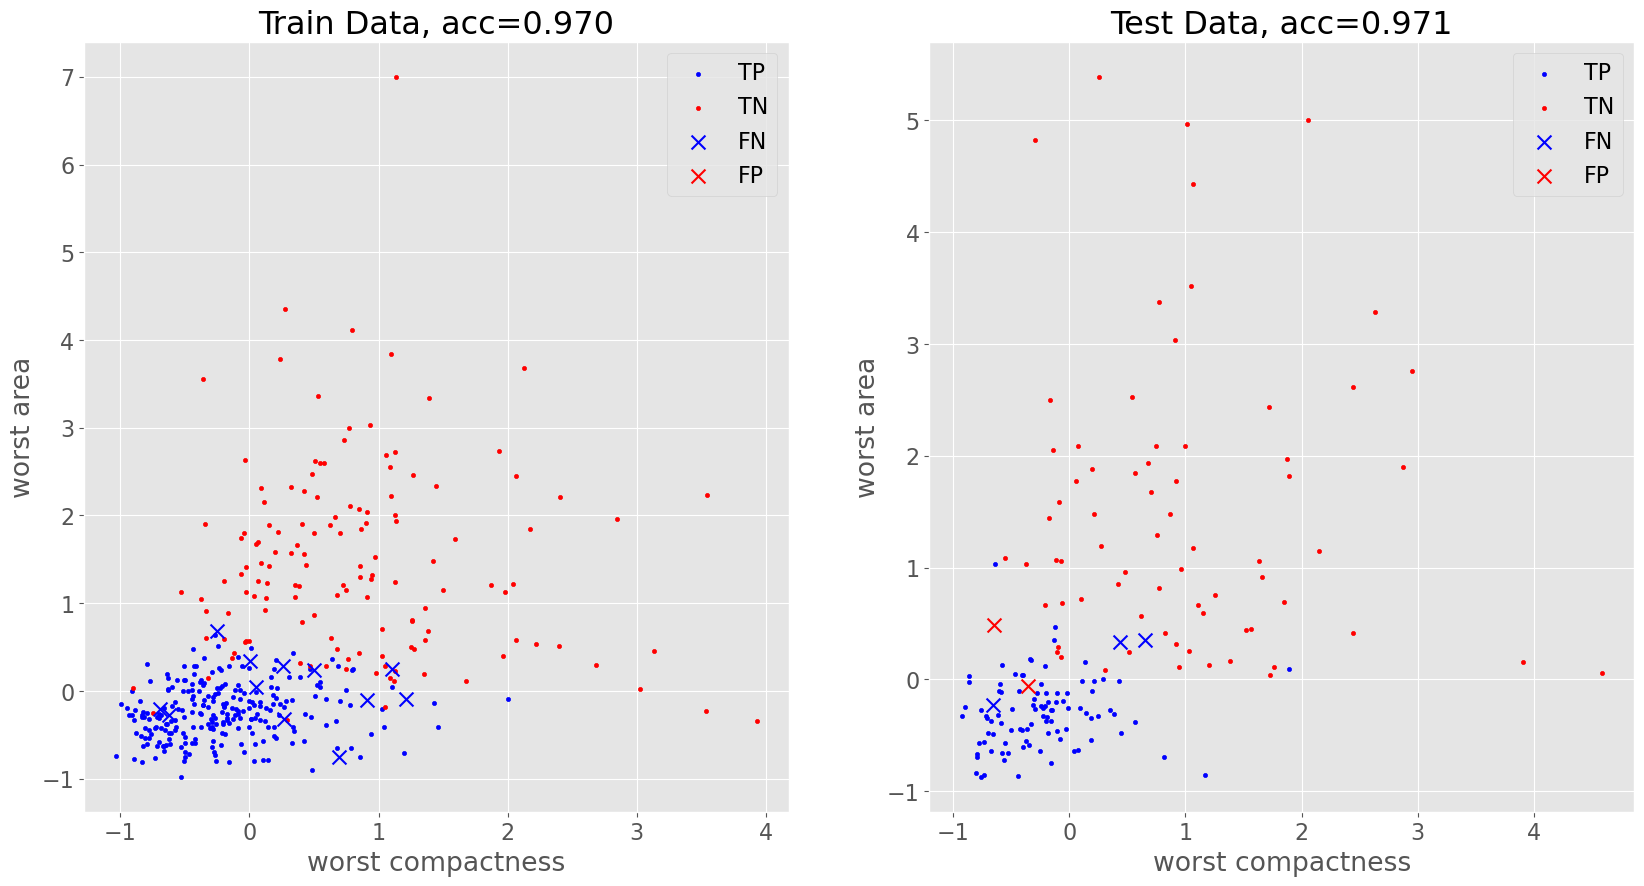


 Original (unscaled) Data:
   Training Accuracy: 0.975
   Testing Accuracy:  0.936

 Scaled (normalized) Data:
   Training Accuracy: 0.970
   Testing Accuracy:  0.971


In [25]:
from sklearn import neighbors

n_neighbors = 2

# Define the classifier
priors=None
test = neighbors.KNeighborsClassifier(n_neighbors)

acc_orig = train_and_plot(test, 
                          data_train, 
                          data_val, 
                          plot_bool=True,
                          x0_col='worst compactness',
                          x1_col='worst area')

acc_norm = train_and_plot(test, 
                          data_train_scaled, 
                          data_val_scaled, 
                          plot_bool=True,
                          x0_col='worst compactness', 
                          x1_col='worst area')

# Print accuracy values
print('\n Original (unscaled) Data:')
print('   Training Accuracy: {:0.3f}'.format(acc_orig['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_orig['acc_test']))
print('\n Scaled (normalized) Data:')
print('   Training Accuracy: {:0.3f}'.format(acc_norm['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_norm['acc_test']))


### HW 2.5: Decision Tree Training
For the Decision Tree classifier (with max_depth = 6), what happens to the **training** accuracy when the data is normalized?

### HW 2.6: Decision Tree Testing
For the Decision Tree classifier (with max_depth = 6), what happens to the **test** accuracy when the data is normalized?

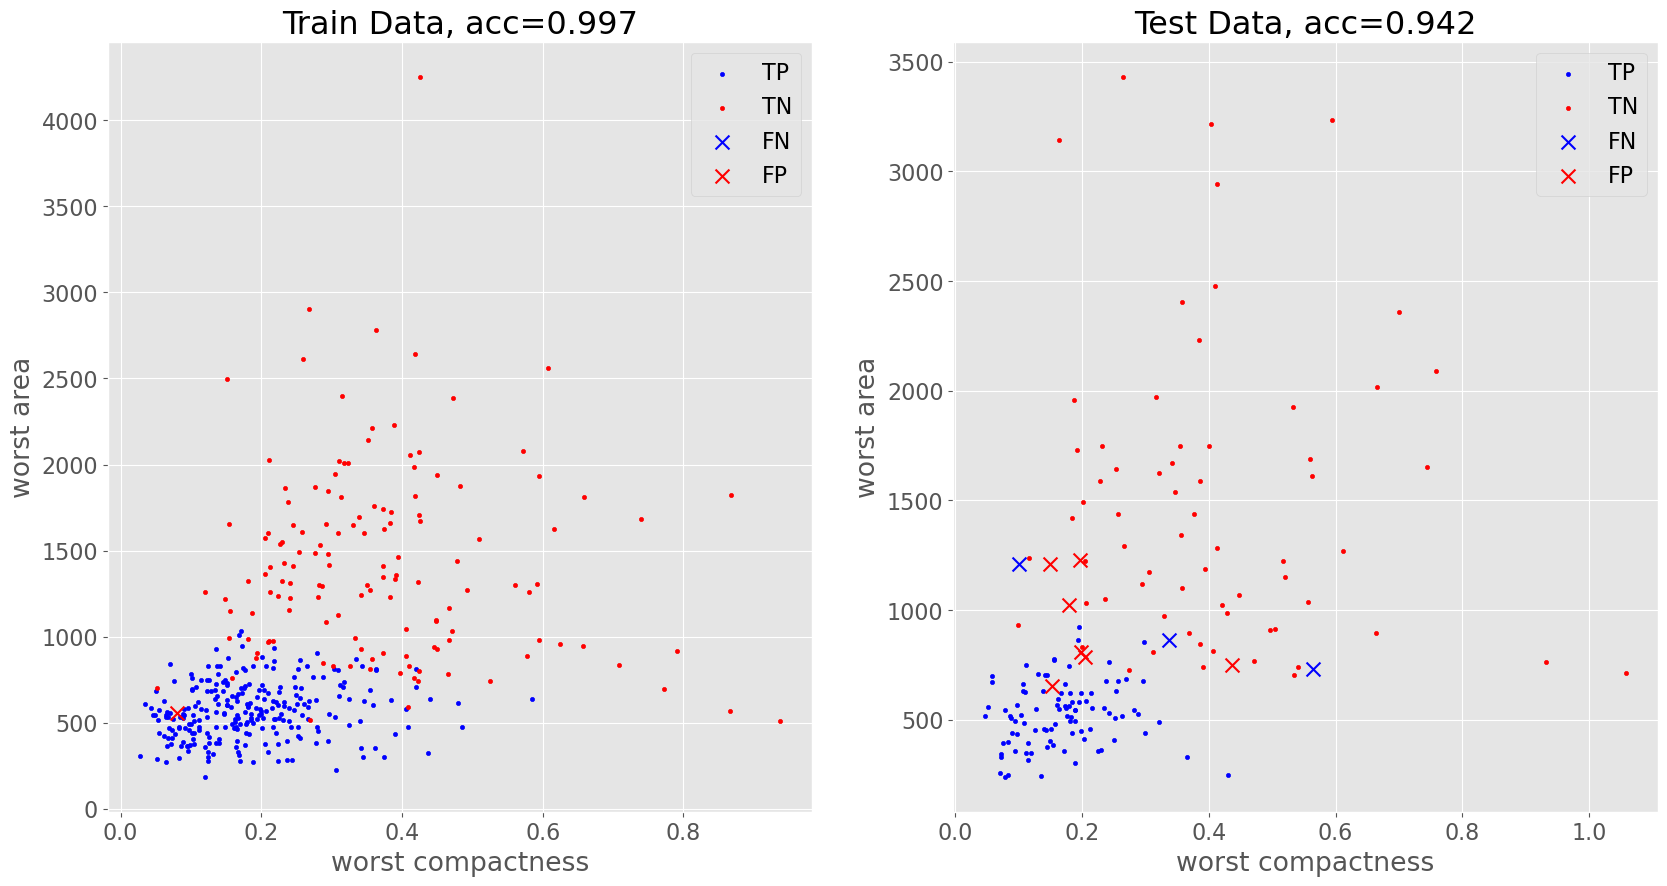

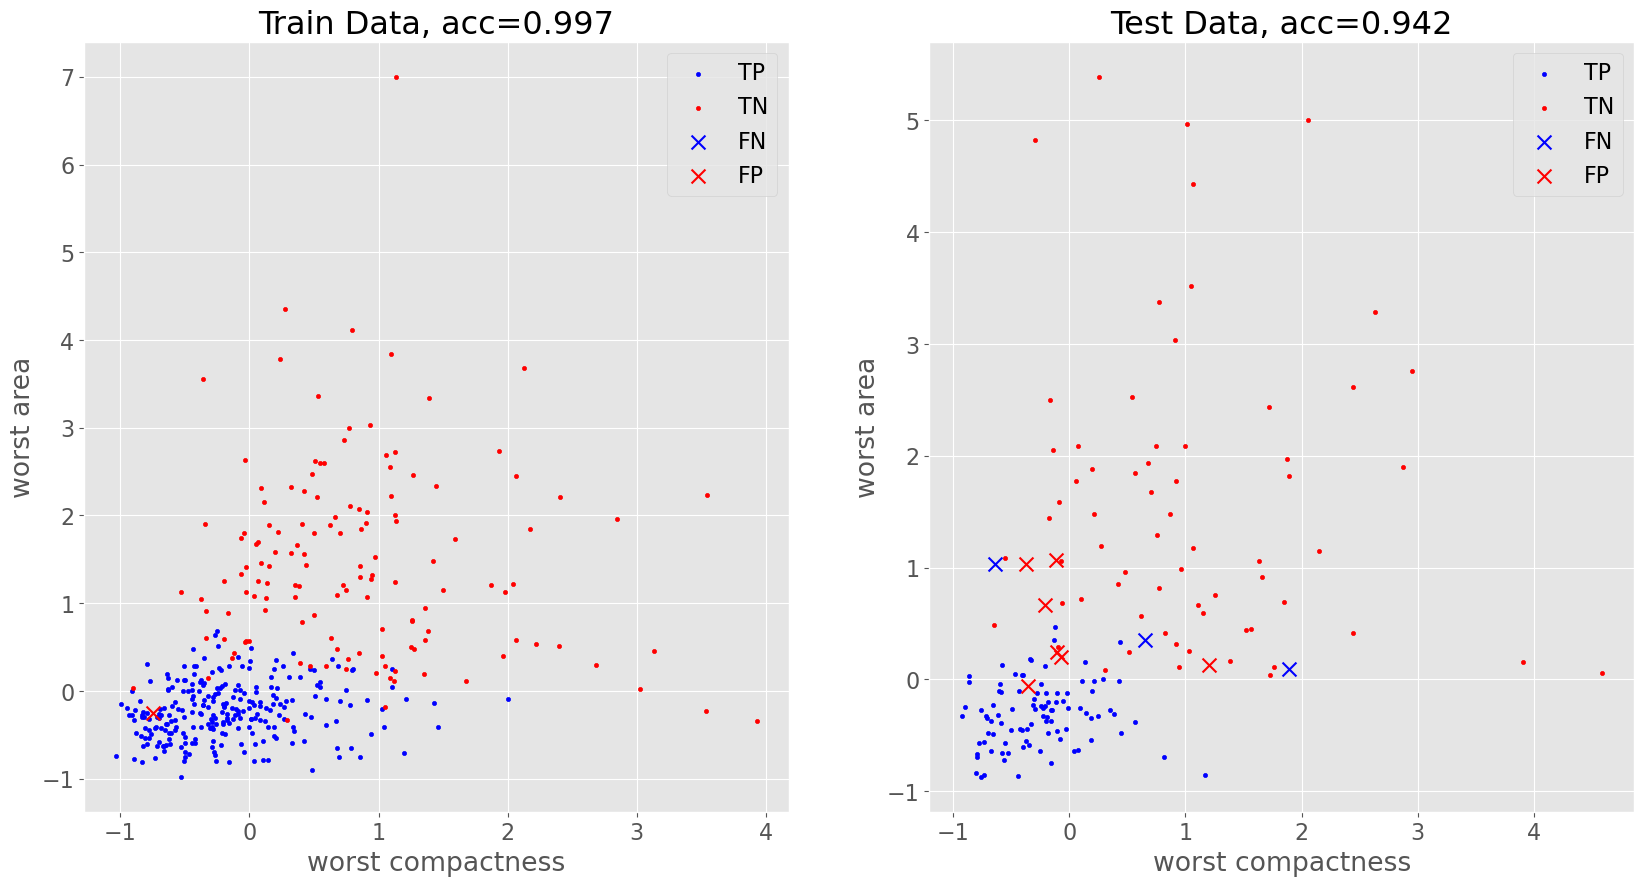


 Original (unscaled) Data:
   Training Accuracy: 0.997
   Testing Accuracy:  0.942

 Scaled (normalized) Data:
   Training Accuracy: 0.997
   Testing Accuracy:  0.942


In [26]:
from sklearn import tree

max_depth = 6
random_state = 999

test = tree.DecisionTreeClassifier(max_depth = 6, random_state = 999)

acc_orig = train_and_plot(test, 
                          data_train, 
                          data_val, 
                          plot_bool=True,
                          x0_col='worst compactness',
                          x1_col='worst area')

acc_norm = train_and_plot(test, 
                          data_train_scaled, 
                          data_val_scaled, 
                          plot_bool=True,
                          x0_col='worst compactness', 
                          x1_col='worst area')
print('\n Original (unscaled) Data:')
print('   Training Accuracy: {:0.3f}'.format(acc_orig['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_orig['acc_test']))
print('\n Scaled (normalized) Data:')
print('   Training Accuracy: {:0.3f}'.format(acc_norm['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_norm['acc_test']))



### HW 2.7: SVM Accuracy - Default Parameters with Unnormalized Data
For the Support Vector Machine classifier with RBF kernel and default parameter values (`C=1.0, gamma='auto'`), what accuracy does sklearn produce when the data is **NOT** normalized?

### HW 2.8: SVM Accuracy - Default Parameters with Normalized Data
For the Support Vector Machine classifier with RBF kernel and default parameter values (`C=1.0, gamma='auto'`), what accuracy does sklearn produce when the data **IS** normalized?

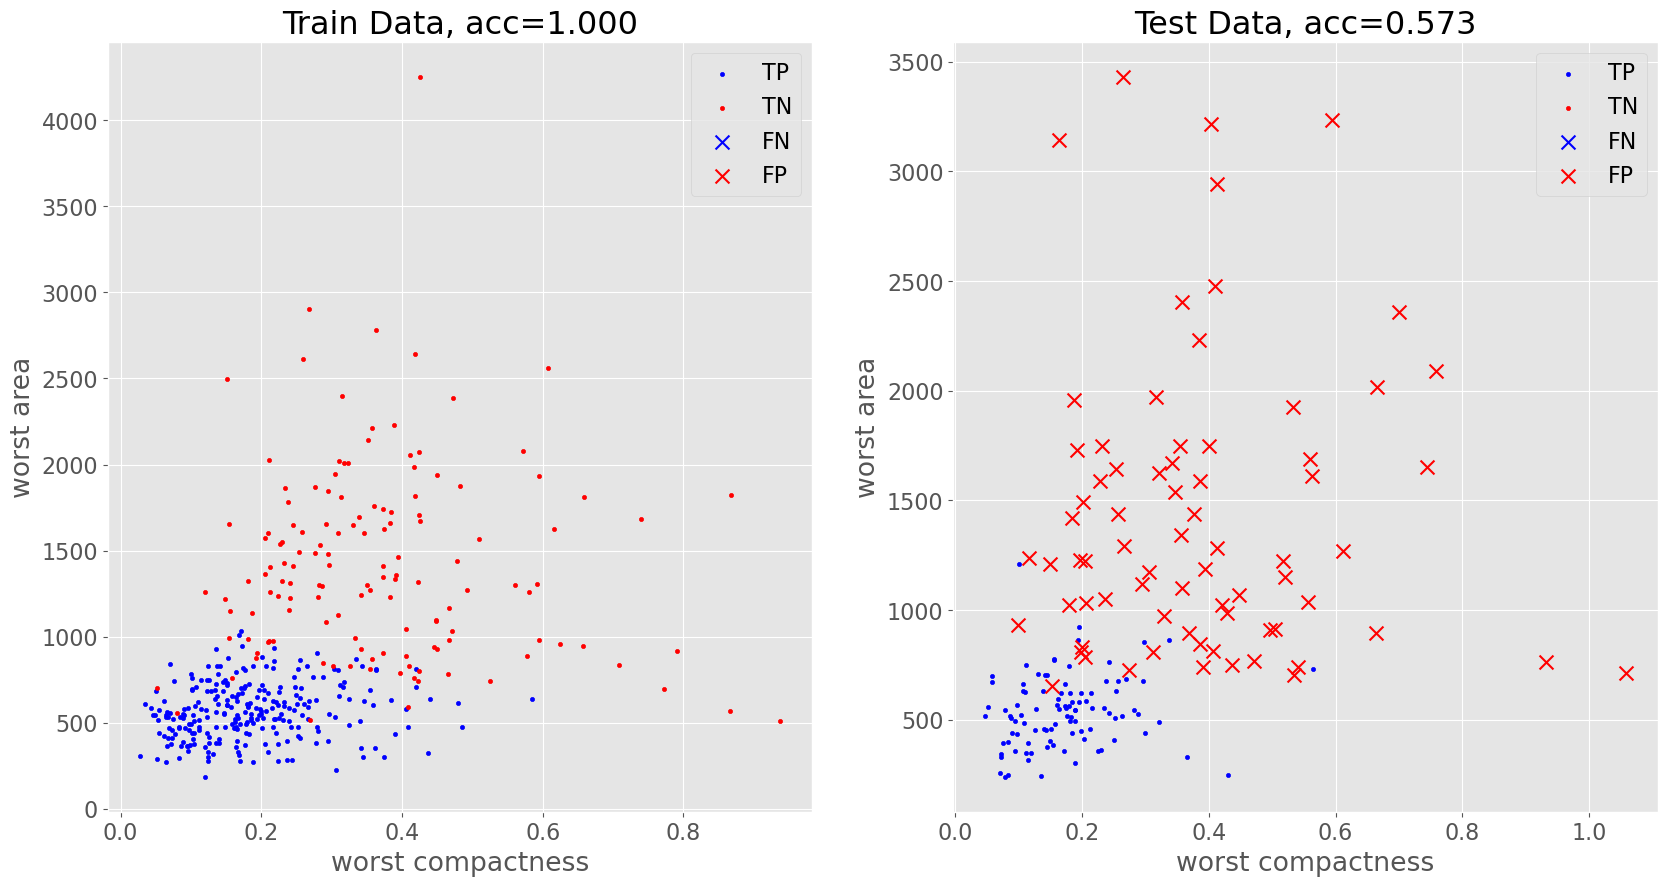

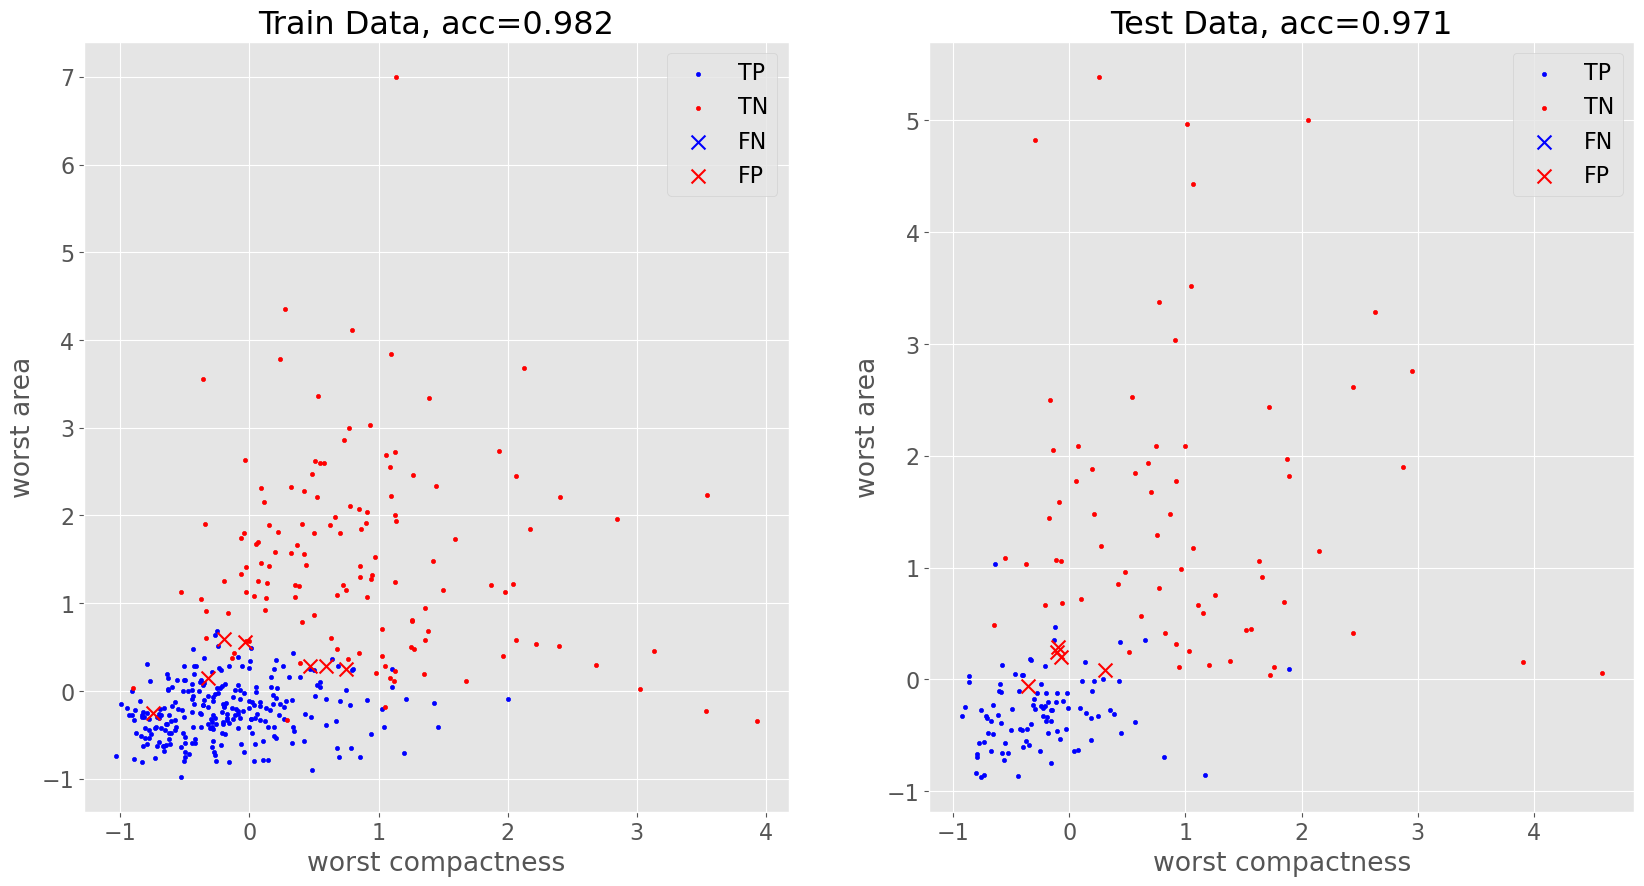


 Scaled (Original) Data:
  Orig Training Accuracy: 1.000
   Testing Accuracy:  0.573
  Norm Training Accuracy: 0.982
   Testing Accuracy:  0.971


In [35]:
from sklearn import svm   

kernel='rbf'
gamma='auto'
C=1.0
random_state = 999

test = svm.SVC(kernel = kernel, gamma = gamma, C= C, random_state = random_state)
acc_orig = train_and_plot(test, 
                          data_train, 
                          data_val, 
                          plot_bool=True,
                          x0_col='worst compactness', 
                          x1_col='worst area')
acc_norm = train_and_plot(test, 
                          data_train_scaled, 
                          data_val_scaled, 
                          plot_bool=True,
                          x0_col='worst compactness', 
                          x1_col='worst area')
print('\n Scaled (Original) Data:')
print('  Orig Training Accuracy: {:0.3f}'.format(acc_orig['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_orig['acc_test']))
print('  Norm Training Accuracy: {:0.3f}'.format(acc_norm['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_norm['acc_test']))

## Support Vector Machine Parameters
Finding good parameters for a support vector classification is an art.  The sklearn SVC default values for $C$ and $\gamma$ can occasionally be used, but often you will need to do a parameter search to parameters that will work well on your data.

The code below plots a heatmap of validation accuracies for varying values of $C$ and $\gamma$ using the RBF kernel (white=high, black=low).  Notice that for this data set (un-normalized), the "best" parameter values are around $C \approx 2.5$ and $\gamma \approx 0.0005$.  (As we will see later, these parameters may not be optimal for the normalized data.)

Note: Running this code may take a little while, so we output the progress within the loop.

00% complete... 
08% complete... 
15% complete... 
23% complete... 
31% complete... 
38% complete... 
46% complete... 
54% complete... 
62% complete... 
69% complete... 
77% complete... 
85% complete... 
92% complete... 


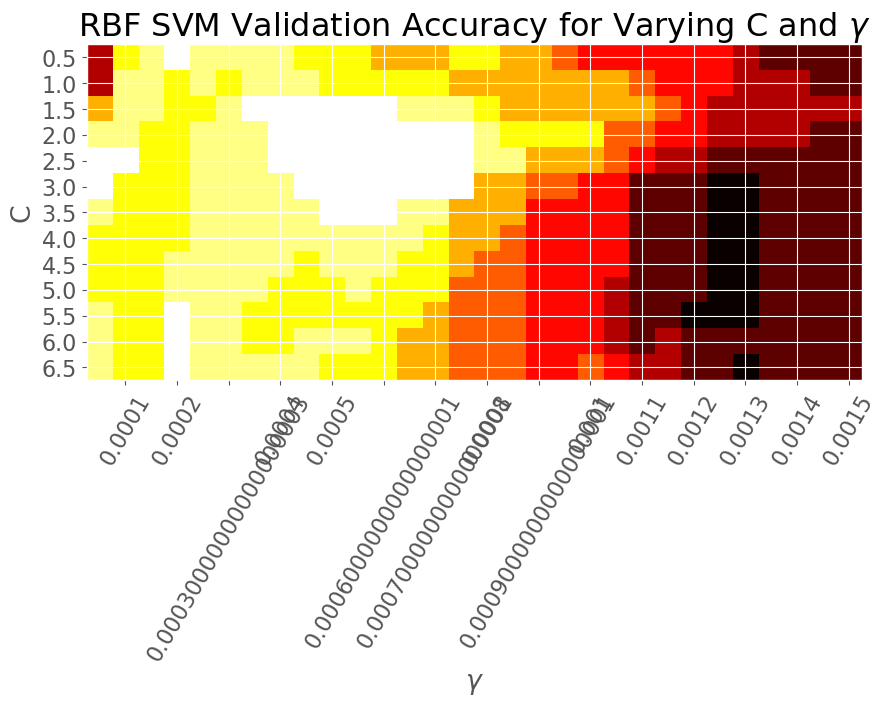

In [36]:
from sklearn import svm   

# Define the values for C and gamma we wish to evaluate
crange = np.arange(0.5,7.0,0.5)
grange = np.arange(0.00005,0.00155,0.00005)
a = np.zeros((crange.shape[0],grange.shape[0]))


# Sweep through our parameters and calculate test accuracy at each value
for cind in range(crange.size):
    
    # Print our current progress
    print('{:02.0f}% complete... '.format(cind/crange.size*100))
    
    for gind in range(grange.size):
        
        # Train a classifier at the current parameter values
        clf = svm.SVC(C=crange[cind],kernel='rbf',gamma=grange[gind],random_state=999)
        acc = train_and_plot(clf, data_train, data_val, plot_bool=False)
        
        # store the accuracy in an numpy.ndarray
        a[cind,gind] = acc['acc_test']
    

# Plot heatmap of accuracy values
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.title(r'RBF SVM Validation Accuracy for Varying C and $\gamma$')
ax = plt.gca()
ax.set_xticks(np.arange(1,grange.size,2))
ax.set_yticks(np.arange(crange.size))
ax.set_xticklabels(grange[1:grange.size:2], rotation = 60)
ax.set_yticklabels(crange)
ax.set_xlabel(r'$\gamma$')
ax.set_ylabel('C')
plt.show()

### HW 2.9: SVM - Effects of Data Normalization
For the Support Vector Machine classifier with RBF kernel and parameter values (`C=2.5, gamma=0.0005`), what happens to the **test** accuracy when the data is normalized?

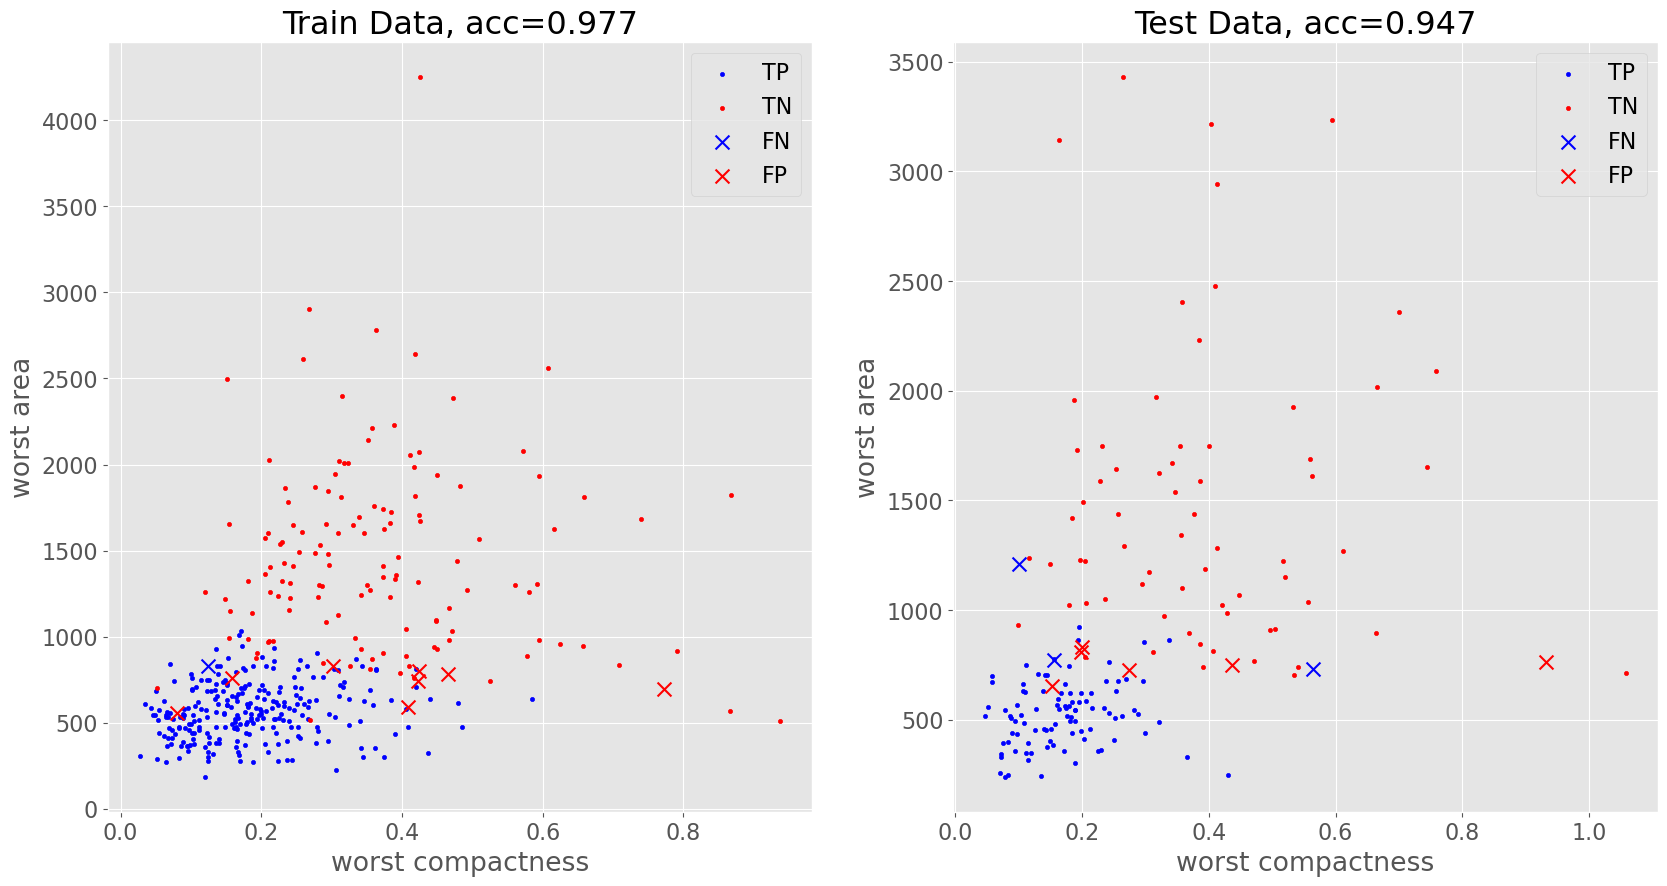

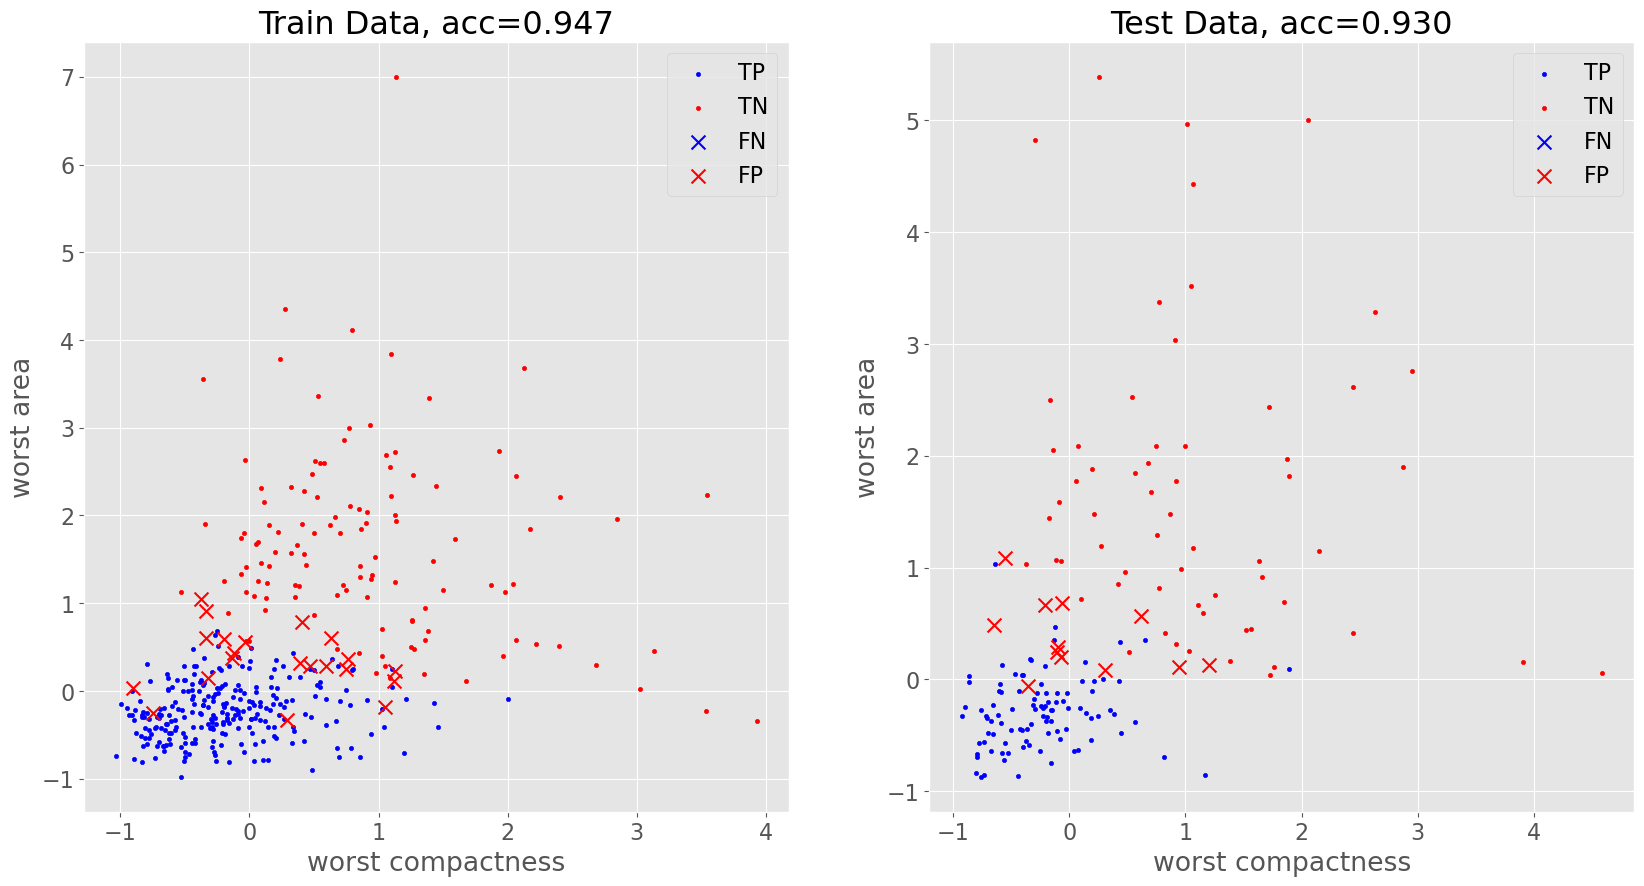


 Scaled (Original) Data:
  Orig Training Accuracy: 0.977
   Testing Accuracy:  0.947
  Norm Training Accuracy: 0.947
   Testing Accuracy:  0.930


In [38]:
kernel='rbf'
gamma=0.0005
C=2.5
random_state = 999
test = svm.SVC(kernel = kernel, gamma = gamma, C= C, random_state = random_state)
acc_orig = train_and_plot(test, 
                          data_train, 
                          data_val, 
                          plot_bool=True,
                          x0_col='worst compactness', 
                          x1_col='worst area')
acc_norm = train_and_plot(test, 
                          data_train_scaled, 
                          data_val_scaled, 
                          plot_bool=True,
                          x0_col='worst compactness', 
                          x1_col='worst area')
print('\n Scaled (Original) Data:')
print('  Orig Training Accuracy: {:0.3f}'.format(acc_orig['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_orig['acc_test']))
print('  Norm Training Accuracy: {:0.3f}'.format(acc_norm['acc_train']))
print('   Testing Accuracy:  {:0.3f}'.format(acc_norm['acc_test']))
